
<img src="fga.png" width="1200" height="400">


<h1><center>Aula 1 - Modelagem do Preço </center></h1>

A presente atividade prática abordará a modelagem estocástica do preço, somado a conceituação de volatilidade, expectativa de retorno o índice Sharpe entre outros aspectos fundamentais e quantitativos.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#Brownian motion">Modelo com Movimento Browniano</a></li>
        <li><a href="#Geometric Brownian motion">Modelo com Movimento Browniano Geometrico</a></li>
        <li><a href="#Log-return">Retorno de um Ativo Financeiro</a></li>
        <li><a href="#Expected return and volatility "> Expectativa de Retorno e Volatilidade </a></li>
        <li><a href="#Risco Retorno">Diagrama Risco Retorno</a></li>
        <li><a href="#Indice Sharpe">Índice Sharpe</a></li>
        <li><a href="#Correlação">Índice de Correlação</a></li>
    </ol>
</div>
<br>
<hr>

Import the Following Libraries:
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>matplotlib.pyplot (as plt)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>seaborn (as sns)</b> </li>
</ul>


In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

<div id="Brownian motion">
    <h2>1) Modelo de Preço com Movimento Browniano</h2>
</div>

<b>Bachelier</b> in 1900 descreveu o movimento do preço como <br>

<ul>
$ \large
\begin{equation}
 p(t)=p(0)+\mu t + \sigma w(t)\\ 
 \end{equation}
$
</ul>

Text(0.5, 1.0, 'Preço Modelado com Movimento Browniano')

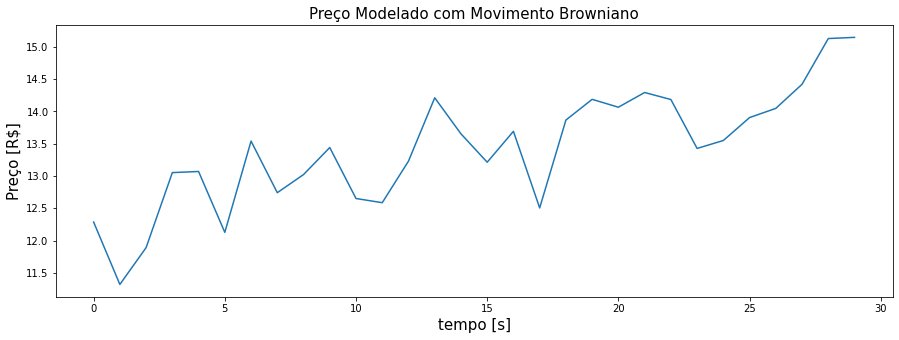

In [2]:
po=12
mu=.1
sigma=0.6
w = np.random.normal(0,1, 30)
t=np.arange(0,30)

p1=po+mu*t+sigma*w

fig = plt.subplots(figsize=(15, 5))
plt.plot(p1)
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preço Modelado com Movimento Browniano',fontsize=15)


<div id="Geometric Brownian motion">
    <h2>2) Modelo de Preço com Movimento Browniano Geometrico</h2>
</div>

Uma melhor modelagem corresponde ao <b>Movimento Geometrico Browniano</b> definido por 
<ul>
$ \large
\begin{equation} 
 \frac{dp(t)}{p(t)}  = \mu dp(t) + \sigma dw(t) \\
 p(t)  =p(0)exp[(\mu-\frac{\sigma^2}{2})t+\sigma w(t)] 
\end{equation} 
$
</ul>

Text(0.5, 1.0, 'Preço Modelado com movimento browniano Geometrico')

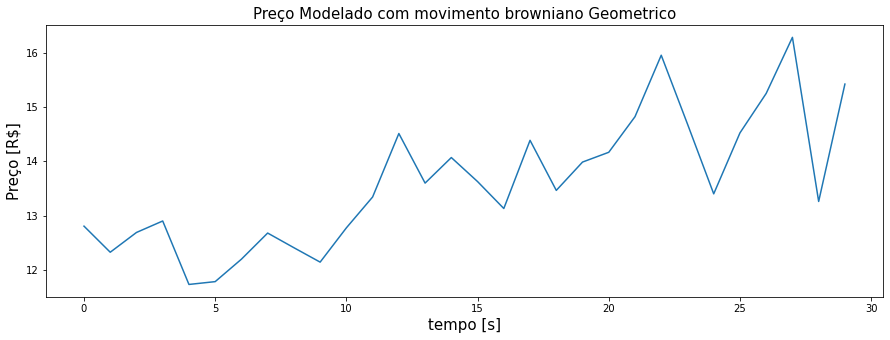

In [3]:
po=12
mu=.01
sigma=.05
w = np.random.normal(0,1, 30)
t=np.arange(0,30)
p2=po*np.exp((mu-(sigma**2)/2)*t+sigma*w)

fig = plt.subplots(figsize=(15, 5))
plt.plot(p2)
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preço Modelado com movimento browniano Geometrico',fontsize=15)

Text(0.5, 1.0, 'Preços Modelados com Movimento Browniano Geometrico')

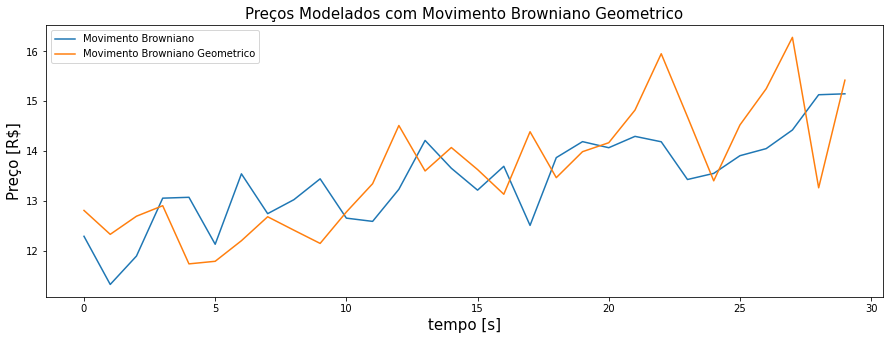

In [4]:
df=pd.DataFrame(p1)
df.columns=['p1']
df['p2']=p2

fig = plt.subplots(figsize=(15, 5))
plt.plot(df['p1'],label='Movimento Browniano')
plt.plot(df['p2'],label='Movimento Browniano Geometrico')

plt.legend(loc='upper left')
plt.ylabel('Preço [R$]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Preços Modelados com Movimento Browniano Geometrico',fontsize=15)


<div id="Log-return">
    <h2>3) Retorno de um Ativo Financeiro</h2>
</div>

O <b>retorno</b> de um ativo em tempo discreto pode ser definindo pelas seguintes equações

<ul>
$ \large
\begin{equation}
 r(n)=\frac{p(n)-p(n-1)}{p(n-1)} \\ 
 r(n)=\frac{p(n)}{p(n-1)}-1 \\
 r(n)=ln[p(n)]-ln[p(n-1)]=ln[\frac{p(n)}{p(n-1)}]\cong\frac{p(n)}{p(n-1)}-1 
\end{equation}
$
</ul>

Text(0.5, 1.0, 'Retorno Modelado com movimento browniano Geometrico')

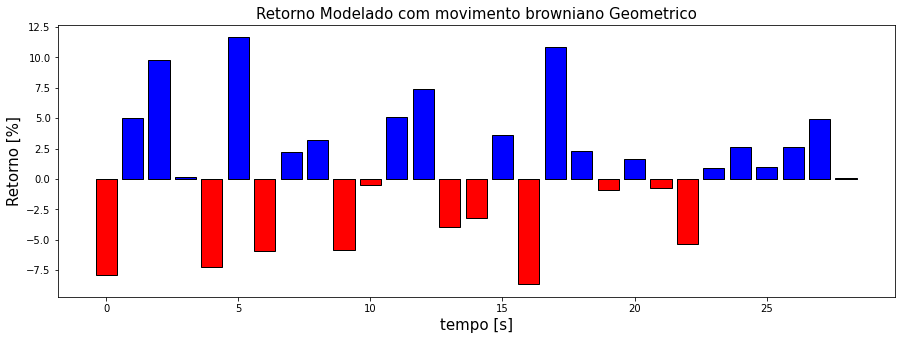

In [5]:
r1=np.log(p1[1:])-np.log(p1[0:-1])

fig = plt.subplots(figsize=(15, 5))

r1m=df['p1'][1:].values/df['p1'][0:-1].values-1
r1m[np.where(r1m>=0)]=0
plt.bar(range(len(r1)),100*r1m,color='red',edgecolor='black')

r1m=df['p1'][1:].values/df['p1'][0:-1].values-1
r1m[np.where(r1m<0)]=0
plt.bar(range(len(r1)),100*r1m,color='blue',edgecolor='black')


plt.ylabel('Retorno [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retorno Modelado com movimento browniano Geometrico',fontsize=15)


Text(0.5, 1.0, 'Retorno Modelado com movimento browniano Geometrico')

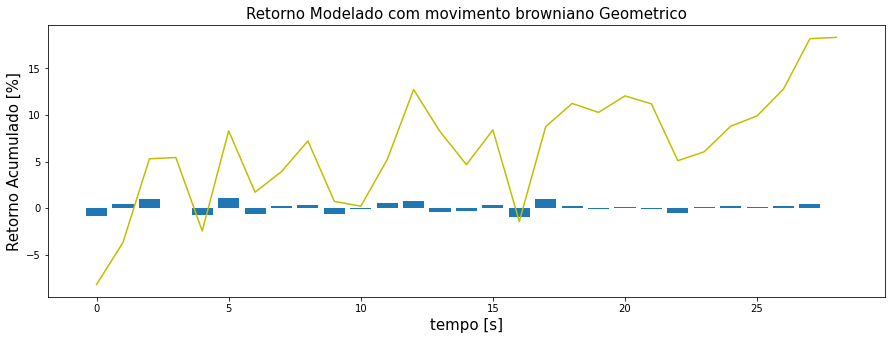

In [6]:
def sumper(per):
    persum=np.cumprod(1 + per) - 1
    return 100*persum

fig = plt.subplots(figsize=(15, 5))

plt.plot(sumper(r1),"y")
plt.bar(range(len(r1)),10*r1)
plt.ylabel('Retorno Acumulado [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retorno Modelado com movimento browniano Geometrico',fontsize=15)

Text(0.5, 1.0, 'Retornos Modelados com Movimento Browniano Geometrico')

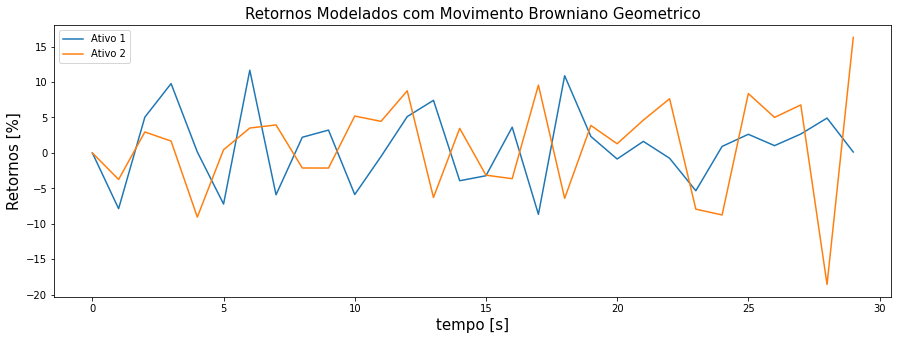

In [7]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=np.concatenate(([0], r1), axis=0)
r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=np.concatenate(([0], r2), axis=0)
#fig = plt.subplots()
#df[['r1','r2']].plot()
#df

fig = plt.subplots(figsize=(15, 5))
plt.plot(100*df['r1'],label='Ativo 1')  
plt.plot(100*df['r2'],label='Ativo 2') 
plt.legend(loc='upper left')
plt.legend(loc='upper left')
plt.ylabel('Retornos [%]',fontsize=15)
plt.xlabel('tempo [s]',fontsize=15)
plt.title('Retornos Modelados com Movimento Browniano Geometrico',fontsize=15)

In [8]:
print("Inicio do Data Frame:")
print(df.head())
print("")
print("Fim do Data Frame:")
print(df.tail())
print("")
print("Algumas Informações:")
print(df.describe())

Inicio do Data Frame:
          p1         p2        r1        r2
0  12.286928  12.806188  0.000000  0.000000
1  11.320425  12.326157 -0.078661 -0.037484
2  11.890546  12.689927  0.050362  0.029512
3  13.052411  12.900993  0.097713  0.016633
4  13.069748  11.733348  0.001328 -0.090508

Fim do Data Frame:
           p1         p2        r1        r2
25  13.904820  14.521969  0.026225  0.083675
26  14.046993  15.248603  0.010225  0.050037
27  14.420863  16.280340  0.026616  0.067661
28  15.128490  13.260470  0.049070 -0.185492
29  15.146977  15.420672  0.001222  0.162905

Algumas Informações:
              p1         p2         r1         r2
count  30.000000  30.000000  30.000000  30.000000
mean   13.415145  13.610531   0.008363   0.008660
std     0.902993   1.206798   0.053359   0.070428
min    11.320425  11.733348  -0.086656  -0.185492
25%    12.811468  12.711178  -0.026319  -0.035137
50%    13.490575  13.432371   0.009677   0.023072
75%    14.060529  14.479366   0.035216   0.049090
ma

<div id="Expected return and volatility">
    <h2>4) Expectativa de Retorno e Volatilidade</h2>
</div>


A <b>Média</b> and <b>Desvio Padrão</b> do retorno de um ativo, $\mu$ and $\sigma$, são definidos com a <b>expectativa de retorno</b> e a  <b>volatilidade</b> de um ativo
<ul>
$ \large
\begin{equation} 
\mu=E\{ r(n) \}=E\{\frac{p(n)-p(n-1)}{p(n-1)}\} \\
\sigma=(E\{r^{2}(n)\}-\mu )^{\frac{1}{2}} \\
\end{equation}
$
</ul>

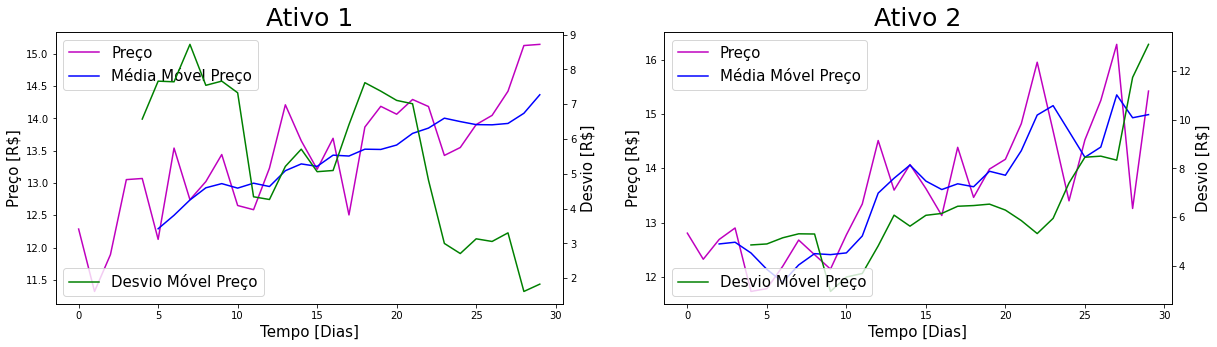

In [9]:
r1=df['p1'][1:].values/df['p1'][0:-1].values-1
df['r1']=100*np.concatenate(([0], r1), axis=0)

r2=df['p2'][1:].values/df['p2'][0:-1].values-1
df['r2']=100*np.concatenate(([0], r2), axis=0)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,2, 1) 
ax1.plot(df['p1'], color='m',label='Preço')  
ax1.plot(df['p1'].rolling(window=6).mean(), color='b',label='Média Móvel Preço')  

ax2 = ax1.twinx()
ax2.plot(df['r1'].rolling(window=5).std(), color='g',label='Desvio Móvel Preço')  
ax1.set_title('Ativo 1',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax2.set_ylabel('Desvio [R$]',fontsize=15)
ax1.set_xlabel('Tempo [Dias]',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)
ax2.legend(loc='lower left',fontsize=15)

ax1=plt.subplot(1,2, 2) 
ax1.plot(df['p2'], color='m',label='Preço')  
ax1.plot(df['p2'].rolling(window=3).mean(), color='b',label='Média Móvel Preço')  

ax2 = ax1.twinx()
ax2.plot(df['r2'].rolling(window=5).std(), color='g',label='Desvio Móvel Preço')  
ax1.set_title('Ativo 2',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax2.set_ylabel('Desvio [R$]',fontsize=15)
ax1.set_xlabel('Tempo [Dias]',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)
ax2.legend(loc='lower left',fontsize=15)


<div id="Risco Retorno">
    <h2>5) Diagrama Risco Retorno</h2>
</div>


Em um <b>diagrama retorno x risco </b> para um dado retorno previsto o risco também é estimado

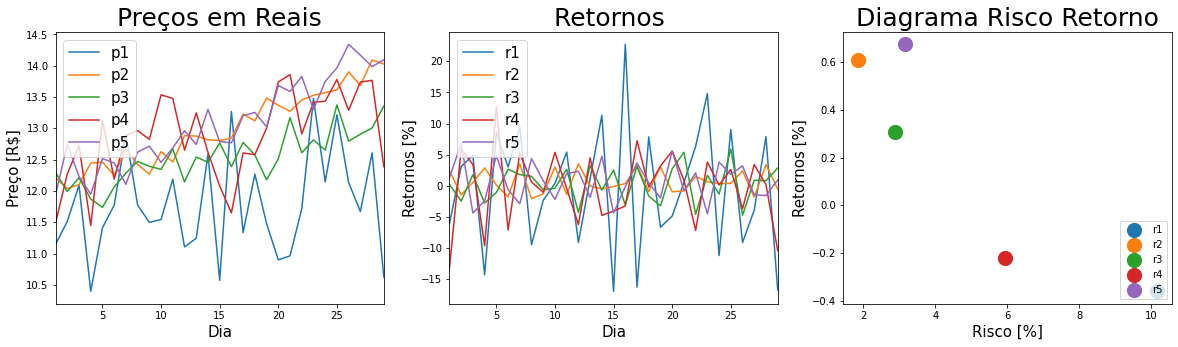

In [10]:
def MBG(po,mu,sigma,t):
    w = np.random.normal(0,1, t)
    t=np.arange(0,t)
    return po*np.exp((mu-(sigma**2)/2)*t+sigma*w)


po    =    [12,   12,   12,   12, 12]
mu    =    [.003, 0.005, 0.0033, 0.0041, 0.006]
sigma =    [0.08,  0.01,  0.02, 0.05, 0.022]
t     =    30

df=None

for i in range(len(po)):
    
    if df is None:
        df=pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))
    else:
        df=pd.concat([df,pd.DataFrame(MBG(po[i],mu[i],sigma[i],t))],axis=1)

df.columns=list(['p'+str(x) for x in range(1,len(po)+1)])
ret=100*df[df.columns[:5]].diff()/df[df.columns[:5]].iloc[0]

ret.columns=list(['r'+str(x) for x in range(1,len(po)+1)])
df=pd.concat([df, ret], axis=1)
df=df.dropna()

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,3, 1) 
df[df.columns[:5]].plot(ax=ax1)
ax1.set_title('Preços em Reais',fontsize=25)
ax1.set_ylabel('Preço [R$]',fontsize=15)
ax1.set_xlabel('Dia',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax1=plt.subplot(1,3, 2) 
df[df.columns[5:]].plot(ax=ax1)
ax1.set_title('Retornos ',fontsize=25)
ax1.set_ylabel('Retornos [%]',fontsize=15)
ax1.set_xlabel('Dia',fontsize=15)
ax1.legend(loc='upper left',fontsize=15)

ax3=plt.subplot(1,3, 3) 
x = df[df.columns[5:]].std().values
y = df[df.columns[5:]].mean().values


#colors = ['b', 'darkorange', 'green', 'r', 'purple']
for i in range(len(x)):
    ax3.scatter(x[i],y[i],  s=200, label='r'+str(1+i))

    
    
    
plt.legend(loc='lower right')


plt.ylabel('Retornos [%]',fontsize=15)
plt.xlabel('Risco [%]',fontsize=15)

plt.title('Diagrama Risco Retorno',fontsize=25)
plt.show()


<div id="Indice Sharpe">
    <h2>6) Indice Sharpe</h2>
</div>



O <b>Índice de Sharpe</b> foi criado por William Sharpe (Nobel de Economia em 1990) e permite avaliar a relação entre o retorno e o risco de um investimento. Ele mede qual é a relação entre o retorno excedente ao ativo livre de risco e a volatilidade.
O <b>Índice Sharpe</b> é definido por
<ul>


$ \Large
\begin{equation} 
 SR=\frac{\mu-r_f}{\sigma}  
\end{equation}
$


</ul>

In [11]:
sharpe5=(df['r4'].mean()-2/(12))/df['r4'].std()
sharpe2=(df['r2'].mean()-2/(12))/df['r2'].std()
print("Indice Sharpe de r4 = %.2f e Indice Shape de r2 = %.2f" % (sharpe5, sharpe2))

Indice Sharpe de r4 = -0.07 e Indice Shape de r2 = 0.24


<div id="Correlação">
    <h2>7) Indice de Correlação</h2>
</div>



O <b>coeficiente de correlação </b> de Pearson ou "ρ de Pearson" identifica o grau da correlação entre duas variáveis &emsp;

<ul> 
$ \large
\begin{equation}  
 cov[r_1(n),r_2(n)]=E\{r_{1}(n)r_{2}(n)\}-\mu_{1} \mu \\[10pt]
 \rho=\frac{E\{r_{1}(n)r_{2}(n)\}-\mu_{1} \mu_{2}}{\sigma_{1} \sigma_{2}} \\
\end{equation}  
$
</ul>


In [12]:
cor1=(np.mean(df['r1']*df['r2'])-np.mean(df['r1'])*np.mean(df['r2']))/(np.std(df['r1'])*np.std(df['r2']))
cor2=df[['r1','r2']].corr()

print("Indice de correlação pela equação explícita (%.2f) e função implícita (%.2f)" % (cor1, cor2['r1'][1]))

Indice de correlação pela equação explícita (-0.13) e função implícita (-0.13)


In [13]:
print('Matriz de Correlações')
print('')
print(df[df.columns[5:]].corr())

Matriz de Correlações

          r1        r2        r3        r4        r5
r1  1.000000 -0.131544 -0.009626  0.266203 -0.099112
r2 -0.131544  1.000000 -0.341070 -0.072523 -0.255605
r3 -0.009626 -0.341070  1.000000  0.239955 -0.203563
r4  0.266203 -0.072523  0.239955  1.000000  0.085599
r5 -0.099112 -0.255605 -0.203563  0.085599  1.000000


In [14]:
from pandas_datareader import data
from tqdm import tqdm

start_date = '2019-08-24'
end_date = '2020-08-24'


df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
Symbols=[sy+'.SA' for sy in list(df[0]['Código'].values)]


output = None
sym=[]
for sy in tqdm(Symbols): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Adj Close"]
        
        if output is None:
            df = stock
            output = df    
            sym.append(sy[:-3])
        else:
            df = stock
            output=pd.concat([output,df],axis=1)     
            sym.append(sy[:-3])
    except:
        print("Erro "+sy)
output.columns=sym

corre=output.pct_change().corr()


100%|██████████| 78/78 [01:21<00:00,  1.04s/it]

Erro Quantidade Teórica Total  Redutor.SA


In [15]:
len(output.columns)

77

In [ ]:
f, ax = plt.subplots(figsize=(45, 30))
sns.heatmap(corre, annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))
ativo='BBDC3'
k = 10 #number of variables for heatmap
cols = corre.nlargest(k, ativo)[ativo].index
cm = np.corrcoef(output[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<b>Fim da Atividade!!!</b> 
